In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # графики
from sklearn.metrics import accuracy_score, classification_report, log_loss
import torch
import perceptron

In [2]:
np.random.seed(0)
# print(np.random.rand(18))

data = pd.read_csv("data.csv", header=None)
tagter = np.array([1 if i == 'M' else 0 for i in data[1]])
tagter[0] = 1
data = data.drop([0, 1], axis=1)
data = StandardScaler().fit_transform(data)
# data = StandardScaler().fit_transform(data)[:, 2:4]

In [3]:
np.random.seed(0)
net = perceptron.Net(2, 2, True, lr=1, min_err=0.05, n_epochs=10000)
net.fit(data, tagter)

epoch 1/10000 - loss: 0.7672957163024071
epoch 2/10000 - loss: 0.6701230347524385
epoch 3/10000 - loss: 0.6642601395479303
epoch 4/10000 - loss: 0.6632472712039751
epoch 5/10000 - loss: 0.66267381316336
epoch 6/10000 - loss: 0.6622264185707432
epoch 7/10000 - loss: 0.6618615745384789
epoch 8/10000 - loss: 0.6615600091984444
epoch 9/10000 - loss: 0.6613077093864179
epoch 10/10000 - loss: 0.6610936816608611
epoch 11/10000 - loss: 0.6609091577354702
epoch 12/10000 - loss: 0.6607470490255501
epoch 13/10000 - loss: 0.6606015290099901
epoch 14/10000 - loss: 0.6604677089634063
epoch 15/10000 - loss: 0.6603413838247074
epoch 16/10000 - loss: 0.6602188299827528
epoch 17/10000 - loss: 0.6600966406376522
epoch 18/10000 - loss: 0.659971587454764
epoch 19/10000 - loss: 0.6598404995348276
epoch 20/10000 - loss: 0.6597001523731528
epoch 21/10000 - loss: 0.6595471605799282
epoch 22/10000 - loss: 0.6593778687811158
epoch 23/10000 - loss: 0.6591882353990152
epoch 24/10000 - loss: 0.65897370399412
epoch 

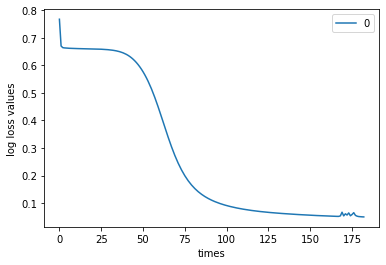

In [4]:
pd.DataFrame(net.mas_logloss).plot()
plt.xlabel('times')
plt.ylabel('log loss values')
plt.show()

In [5]:
print(classification_report(tagter, net.predict(data)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       357
           1       1.00      0.98      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



In [10]:
accuracy_score(tagter, net.predict(data))

0.9912126537785588

In [11]:
net.dump_net()

In [12]:
new_net = net.load_net()

In [13]:
print(classification_report(tagter, new_net.predict(data)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       357
           1       1.00      0.98      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

